# chapter 4 scratch

In [1]:
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## gradient descent

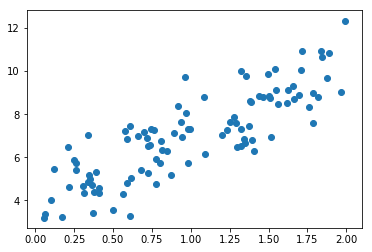

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

pylab.scatter(X, y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 3.87733104]
 [ 3.14701176]]


In [4]:
X_new = np.arange(0, 2, 0.05)
X_new_b = np.c_[np.ones((len(X_new), 1)), X_new]
y_predict = X_new_b.dot(theta_best)

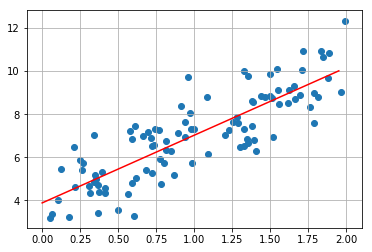

In [5]:
pylab.scatter(X, y)
pylab.grid(True)
pylab.plot(X_new, y_predict, 'r')

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(np.array([[0], [2]]))

[ 3.87733104] [[ 3.14701176]]


array([[  3.87733104],
       [ 10.17135456]])

### batch gradient descent

In [7]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

In [8]:
theta

array([[ 3.87733104],
       [ 3.14701176]])

### stochastic gradient descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [10]:
theta

array([[ 3.88312882],
       [ 3.16519988]])

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[ 3.84975782] [ 3.11510494]


## polynomial regression

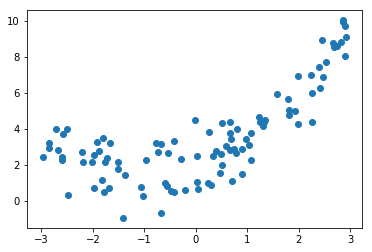

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * (X**2) + X + 2 + np.random.randn(m,1)

pylab.scatter(X, y)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[ 0.50258663]
[ 0.50258663  0.25259332]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 1.94841444] [[ 0.98837626  0.50517503]]


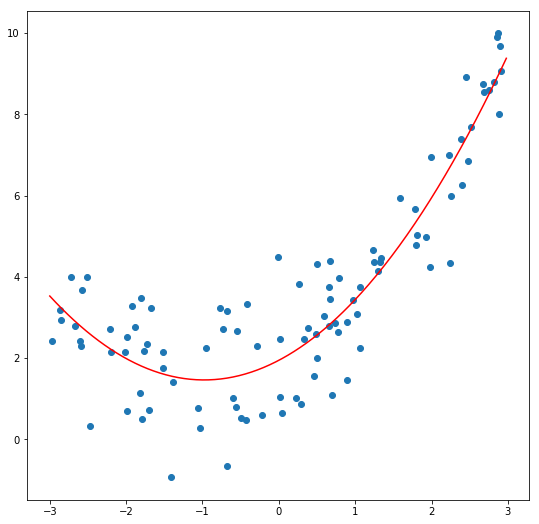

In [15]:
pylab.figure(figsize=(9,9))
pylab.scatter(X, y)
X_new = np.arange(-3, 3, 0.02)
X_new = X_new.reshape(-1,1)
X_new_p = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_p)
pylab.plot(X_new, y_new, 'r')

## learning curves

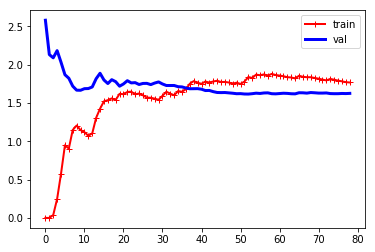

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = list(), list()
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    pylab.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    pylab.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    pylab.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Training error plateaus such that adding more instances doesn't help.  Need better features or more complex model or both - current model is *underfitting*.

Validation error also flattens at roughly same error.

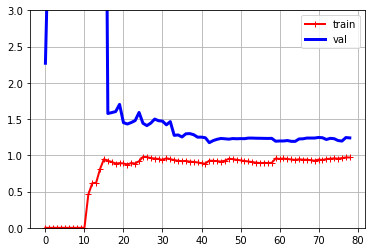

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
pylab.ylim((0, 3))
pylab.grid()

* training error is reduced
* some gap between curves - model does better on training data than validation -> *overfitting*

## Regularized Linear Models

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

s1 = StandardScaler()
poly_features = PolynomialFeatures(degree=10, include_bias=False)

X_new_p = poly_features.fit_transform(X)
X_p_s = s1.fit_transform(X)

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_p_s, y)
ridge_reg.predict([[1.5]])

array([[ 6.2286554]])

In [19]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X_p_s, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.71529893])

In [20]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.96564456])

In [21]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.96546584])

### early stopping

In [22]:
from sklearn.base import clone

X_poly = poly_features.fit_transform(X)
X_poly_sclaed = s1.fit_transform(X_poly)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch, best_model = None, None

for epoch in range(999):
    sgd_reg.fit(X_poly_scaled, y

SyntaxError: unexpected EOF while parsing (<ipython-input-22-2d87b1bd6c1e>, line 13)

## logistic regression

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:,3:]  # petal width
y = (iris["target"] == 2).astype(np.int)

['data', 'DESCR', 'target_names', 'feature_names', 'target']


In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

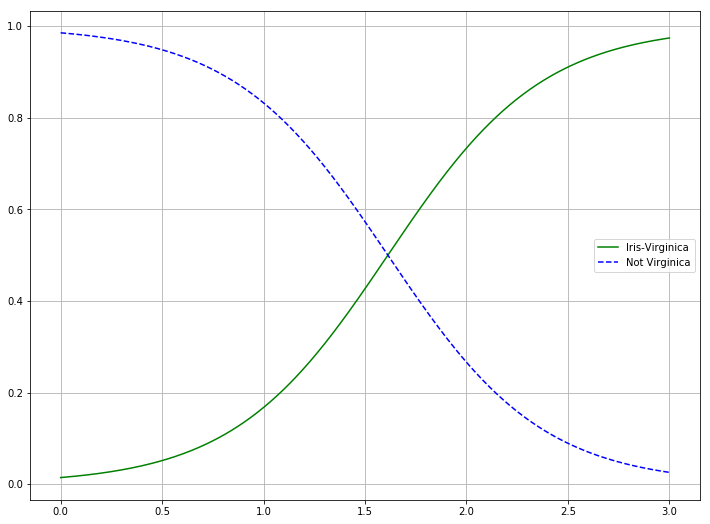

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
pylab.figure(figsize=(12,9))
pylab.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
pylab.plot(X_new, y_proba[:,0], "b--", label="Not Virginica")
pylab.grid()
pylab.legend()

In [31]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
softmax_reg.predict([[5, 2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])